# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
cities

['bluff',
 'arlit',
 'ushuaia',
 'dikson',
 'marawi',
 'barrow',
 'dutse',
 'lebu',
 'vuktyl',
 'pierre',
 'punta arenas',
 'illoqqortoormiut',
 'ostrovnoy',
 'halalo',
 'punto fijo',
 'new norfolk',
 'sampit',
 'georgetown',
 'bethel',
 'ribeira grande',
 'busselton',
 'ahipara',
 'upernavik',
 'fortuna',
 'negele',
 'comodoro rivadavia',
 'souillac',
 'leningradskiy',
 'bandarbeyla',
 'mys shmidta',
 'saldanha',
 'lorengau',
 'ereymentau',
 'teguldet',
 'taolanaro',
 'howard springs',
 'rikitea',
 'mathathane',
 'khatanga',
 'jizan',
 'cape town',
 'umea',
 'elizabeth city',
 'kassala',
 'pisco',
 'rio verde de mato grosso',
 'ofaqim',
 'kapaa',
 'sao paulo de olivenca',
 'mataura',
 'sao filipe',
 'mar del plata',
 'lompoc',
 'kincardine',
 'provideniya',
 'brae',
 'erzurum',
 'bakel',
 'coro',
 'adrar',
 'kavaratti',
 'korla',
 'lages',
 'puerto colombia',
 'hilo',
 'albany',
 'eureka',
 'laguna',
 'kysyl-syr',
 'san buenaventura',
 'mahebourg',
 'thompson',
 'hermanus',
 'berlevag

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#importing Json dependencies
import requests
import json

In [6]:
#Perform a weather check on each city using a series of successive API calls.
#Loop through the API and retrieve weather data
city_data = []

# Log counter
record = 1

#Include a print log of each city as it's being processed (with the city number and city name).
print(f"Beginning Data Retrieval")
print(f"-------------------------")

for row in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q={row}"
    try: 
        weather = requests.get(url).json()
        temp = weather["main"]["temp"]
        humidity = weather["main"]["humidity"]
        cloudiness = weather["clouds"]["all"]
        wind_speed = weather["wind"]["speed"]
        lat = weather["coord"]["lat"]
        lon = weather["coord"]["lon"]
        city_name = weather["name"]

        city_data.append({"City": city_name,
                         "Temp": temp,
                         "Humidity": humidity,
                         "Cloudiness": cloudiness,
                         "Wind Speed": wind_speed,
                         "Latitude": lat,
                         "Longitude": lon
                         })
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        #Counter increment
        record= record + 1
        
        #Wait limit for API call rate
        time.sleep(1.01)
    
    #If no record, 
    except: 
        print("City not found. Skipping...")

        
        
#* Display the DataFrame        
weather_data_df = pd.DataFrame(city_data)
weather_data_df


        

City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found


,City,Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Bluff,45.00,84,79,3.00,-46.60,168.33
1,Arlit,88.50,42,75,14.61,18.74,7.39
2,Ushuaia,35.60,94,40,26.40,-54.80,-68.30
3,Dikson,43.16,83,96,16.75,73.51,80.55
4,Marawi,73.00,93,76,5.01,8.00,124.29
...,...,...,...,...,...,...,...
558,Qaqortoq,53.60,71,75,6.93,60.72,-46.03
559,Kapiri Mposhi,52.30,83,0,6.44,-13.97,28.68
560,Shabo,75.09,60,2,9.19,46.13,30.39
561,Inta,48.40,84,84,8.32,66.03,60.17


### Convert Raw Data to DataFrame

In [16]:
# Export the city data into a .csv.

# Create the output File (CSV)
city_data_output = "/Users/bartholdy9000/Desktop/UPenn Bootcamp/Homework/6.python-api-challenge/city_data.csv"
# Export the City_Data into a csv
weather_data_df.to_csv(city_data_output, index_label="City ID")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
weather_data_df[weather_data_df["Humidity"]>100]

,City,Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude


In [9]:
#Skipping this step because of no cities that have humidity > 100%.

#Otherwise, would have done this:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [10]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

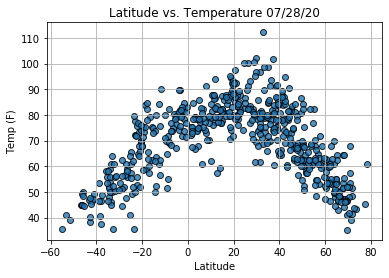

In [17]:
#Temp (F) vs. Latitude, using MatPlotLib
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(weather_data_df["Latitude"],
            weather_data_df["Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)
# Incorporate the other graph properties.
plt.title(f"Latitude vs. Temperature "+ time.strftime("%x"))
plt.ylabel("Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/bartholdy9000/Desktop/UPenn Bootcamp/Homework/6.python-api-challenge/Fig1.png")
# Show plot.
plt.show()

## Latitude vs. Humidity Plot

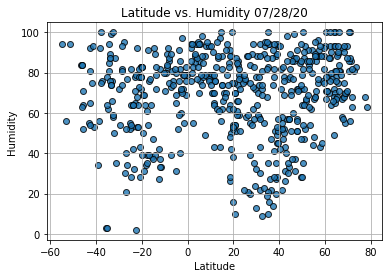

In [18]:
#Humidity (%) vs. Latitude, using MatPlotLib
# Build the scatter plot for Humidity (%) vs. Latitude.
plt.scatter(weather_data_df["Latitude"],
            weather_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)
# Incorporate the other graph properties.
plt.title(f"Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/bartholdy9000/Desktop/UPenn Bootcamp/Homework/6.python-api-challenge/Fig2.png")
# Show plot.
plt.show()

## Latitude vs. Cloudiness Plot

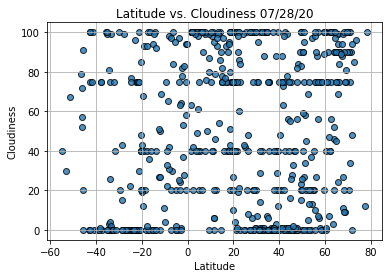

In [19]:
#Cloudiness (%) vs. Latitude, using MatPlotLib
# Build the scatter plot for Cloudiness (%) vs. Latitude.
plt.scatter(weather_data_df["Latitude"],
            weather_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)
# Incorporate the other graph properties.
plt.title(f"Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/bartholdy9000/Desktop/UPenn Bootcamp/Homework/6.python-api-challenge/Fig3.png")
# Show plot.
plt.show()

## Latitude vs. Wind Speed Plot

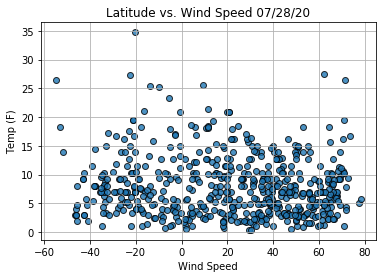

In [20]:
#Wind Speed (mph) vs. Latitude, using MatPlotLib
# Build the scatter plot for #Wind Speed (mph) vs. Latitude.
plt.scatter(weather_data_df["Latitude"],
            weather_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)
# Incorporate the other graph properties.
plt.title(f"Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Temp (F)")
plt.xlabel("Wind Speed")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/bartholdy9000/Desktop/UPenn Bootcamp/Homework/6.python-api-challenge/Fig4.png")
# Show plot.
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression